In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
data = pd.read_csv("Titanic-Train-Data.csv")

## Data Preprocessing and Cleaning

In [3]:
data.drop(["Name","Ticket"],axis=1,inplace=True)

In [4]:
def male_ohe(g):
    if g == "male":
        return 1
    else:
        return 0

def female_ohe(g):
    if g == "female":
        return 1
    else:
        return 0

In [5]:
data["Male"] = data["Sex"].apply(male_ohe)
data["Female"] = data["Sex"].apply(female_ohe)

In [6]:
data.drop("Sex",axis=1,inplace=True)
data.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Male,Female
0,2,29.0,1,0,26.000,NaN,S,1,0,1
1,3,NaN,0,0,8.050,NaN,S,0,1,0
2,2,39.0,0,0,26.000,NaN,S,0,1,0
3,3,29.0,0,4,21.075,NaN,S,0,0,1
4,3,25.0,0,0,7.050,NaN,S,0,1,0


In [7]:
data.isnull().sum()

Pclass        0
Age         132
SibSp         0
Parch         0
Fare          0
Cabin       514
Embarked      1
Survived      0
Male          0
Female        0
dtype: int64

In [8]:
def cherbourg(s):
    if s=="C":
        return 1
    else:
        return 0
    
def queenstown(s):
    if s=="Q":
        return 1
    else:
        return 0

def southamptom(s):
    if s=="S":
        return 1
    else:
        return 0

In [9]:
data["Cherbourg"] = data.Embarked.apply(cherbourg)
data["Queenstown"] = data.Embarked.apply(queenstown)
data["Southamptom"] = data.Embarked.apply(southamptom)
data.drop("Embarked",axis=1, inplace=True)
data.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Survived,Male,Female,Cherbourg,Queenstown,Southamptom
0,2,29.0,1,0,26.000,NaN,1,0,1,0,0,1
1,3,NaN,0,0,8.050,NaN,0,1,0,0,0,1
2,2,39.0,0,0,26.000,NaN,0,1,0,0,0,1
3,3,29.0,0,4,21.075,NaN,0,0,1,0,0,1
4,3,25.0,0,0,7.050,NaN,0,1,0,0,0,1


In [10]:
def cabin(x):
    if x is np.nan:
        return 0
    else:
        return 1

In [11]:
data["Cabin"] = data.Cabin.apply(cabin)
data.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Survived,Male,Female,Cherbourg,Queenstown,Southamptom
0,2,29.0,1,0,26.000,0,1,0,1,0,0,1
1,3,NaN,0,0,8.050,0,0,1,0,0,0,1
2,2,39.0,0,0,26.000,0,0,1,0,0,0,1
3,3,29.0,0,4,21.075,0,0,0,1,0,0,1
4,3,25.0,0,0,7.050,0,0,1,0,0,0,1


In [12]:
data.isnull().sum()

Pclass           0
Age            132
SibSp            0
Parch            0
Fare             0
Cabin            0
Survived         0
Male             0
Female           0
Cherbourg        0
Queenstown       0
Southamptom      0
dtype: int64

In [13]:
data["Age"].fillna(data["Age"].mean(),inplace=True)
data.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Survived,Male,Female,Cherbourg,Queenstown,Southamptom
0,2,29.00000,1,0,26.000,0,1,0,1,0,0,1
1,3,29.70056,0,0,8.050,0,0,1,0,0,0,1
2,2,39.00000,0,0,26.000,0,0,1,0,0,0,1
3,3,29.00000,0,4,21.075,0,0,0,1,0,0,1
4,3,25.00000,0,0,7.050,0,0,1,0,0,0,1


In [14]:
data.describe()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Survived,Male,Female,Cherbourg,Queenstown,Southamptom
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,2.296407,29.700560,0.528443,0.407186,32.064552,0.230539,0.402695,0.639222,0.360778,0.199102,0.074850,0.724551
std,0.831638,12.753571,1.080327,0.854695,45.320835,0.421493,0.490808,0.480586,0.480586,0.399624,0.263347,0.447075
min,1.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.925000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,29.700560,0.000000,0.000000,14.750000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,35.000000,1.000000,0.000000,31.275000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
data["Age_Age"] = data["Age"]*data["Age"]
data["Fare_Fare"] = data["Fare"]*data["Fare"]

In [18]:
data.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Male,Female,Cherbourg,Queenstown,Southamptom,Survived,Age_Age,Fare_Fare
0,2,29.00000,1,0,26.000,0,0,1,0,0,1,1,841.000000,676.000000
1,3,29.70056,0,0,8.050,0,1,0,0,0,1,0,882.123247,64.802500
2,2,39.00000,0,0,26.000,0,1,0,0,0,1,0,1521.000000,676.000000
3,3,29.00000,0,4,21.075,0,0,1,0,0,1,0,841.000000,444.155625
4,3,25.00000,0,0,7.050,0,1,0,0,0,1,0,625.000000,49.702500


In [19]:
data = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Cabin','Male','Female','Cherbourg','Queenstown','Southamptom','Age_Age','Fare_Fare','Survived']]
data.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Male,Female,Cherbourg,Queenstown,Southamptom,Age_Age,Fare_Fare,Survived
0,2,29.00000,1,0,26.000,0,0,1,0,0,1,841.000000,676.000000,1
1,3,29.70056,0,0,8.050,0,1,0,0,0,1,882.123247,64.802500,0
2,2,39.00000,0,0,26.000,0,1,0,0,0,1,1521.000000,676.000000,0
3,3,29.00000,0,4,21.075,0,0,1,0,0,1,841.000000,444.155625,0
4,3,25.00000,0,0,7.050,0,1,0,0,0,1,625.000000,49.702500,0


In [20]:
data = data.values

In [21]:
data.shape

(668, 14)

In [23]:
X = data[:,0:13]
Y = data[:,13]
X.shape,Y.shape

((668, 13), (668,))

In [24]:
scaler = preprocessing.StandardScaler()

In [25]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
X_scaled = scaler.transform(X)
X_scaled.shape

(668, 13)

In [27]:
X_scaled = np.append(X_scaled,np.ones(X_scaled.shape[0]).reshape(-1,1),axis=1)

In [28]:
X_scaled.shape,X_scaled[0].shape

((668, 14), (14,))

In [29]:
def sigmoid(agg):
    
    return 1/(1+np.exp(-agg))

def cost(X_train,Y_train,m):
    
    cost_ = 0
    N = X_train.shape[0]
    for i in range(N):
        agg = (X_train[i]*m).sum()
        h = sigmoid(agg)
        cost = -Y_train[i]*np.log(h) - (1-Y_train[i])*np.log(1-h)
        cost_ += cost
    
    return cost_

def step_gradient(X_train,Y_train,lr,m):
    
    N = X_train.shape[0]
    slope_m = np.zeros(X_train.shape[1])
    for i in range(N):
        agg = (X_train[i]*m).sum()
        h = sigmoid(agg)
        slope_m+=(-1/N)*(Y_train[i]-h)*X_train[i]
        
    m = m - lr*slope_m
    return m

def fit(X_train,Y_train,epochs=100,lr=0.01):
    
    m = np.zeros(X_train.shape[1])
    cost_array = []
    unit = epochs//10
    for i in range(epochs):
        m = step_gradient(X_train,Y_train,lr,m)
        cost_ = cost(X_train,Y_train,m)
        cost_array.append(cost_)
        if i%unit==0:
            print("Epoch:{}, Cost:{}".format(i,cost_))
    
    return m,cost_array

def predict(X_test,m):
    
    y_pred = []
    N = X_test.shape[0]
    for i in range(N):
        agg = (X_test[i]*m).sum()
        h = sigmoid(agg)
        if h>=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
            
    return np.array(y_pred)

def accuracy(Y_test,Y_pred):
    
    correct = 0
    N = Y_test.shape[0]
    correct = (Y_test==Y_pred).sum()
    
    return (correct/N)*100

In [32]:
m,cost_array = fit(X_scaled,Y,5000,0.5)
print(m)

Epoch:0, Cost:398.78256797753954
Epoch:500, Cost:299.2467352457671
Epoch:1000, Cost:299.1151975993101
Epoch:1500, Cost:299.1088103838438
Epoch:2000, Cost:299.1064783767899
Epoch:2500, Cost:299.1044400404672
Epoch:3000, Cost:299.10255894319636
Epoch:3500, Cost:299.1008149361133
Epoch:4000, Cost:299.099193688215
Epoch:4500, Cost:299.09768286063513
[-0.75859621 -1.18313378 -0.3758162  -0.17461447 -0.03936483  0.24553742
 -0.66053183  0.66053183 -0.10568944 -0.05665953 -0.2759795   0.70791327
  0.05525565 -0.51138286]


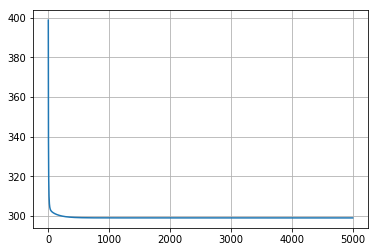

In [33]:
plt.plot(cost_array)
plt.grid()
plt.show()

In [34]:
y_pred_train = predict(X_scaled,m)

In [35]:
accuracy(Y,y_pred_train)

80.23952095808383

In [36]:
X_test = pd.read_csv("Titanic-Test-Data.csv")

In [37]:
X_test.drop(["Name","Ticket"],axis=1,inplace=True)

In [38]:
X_test["Male"] = X_test["Sex"].apply(male_ohe)
X_test["Female"] = X_test["Sex"].apply(female_ohe)

In [39]:
X_test.drop("Sex",axis=1,inplace=True)
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Male,Female
0,2,8.0,1,1,36.7500,NaN,S,1,0
1,1,49.0,0,0,25.9292,D17,S,0,1
2,3,NaN,0,0,7.7375,NaN,Q,1,0
3,2,24.0,2,1,27.0000,NaN,S,0,1
4,1,36.0,0,0,26.2875,E25,S,1,0


In [40]:
X_test["Cherbourg"] = X_test.Embarked.apply(cherbourg)
X_test["Queenstown"] = X_test.Embarked.apply(queenstown)
X_test["Southamptom"] = X_test.Embarked.apply(southamptom)
X_test.drop("Embarked",axis=1, inplace=True)
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Male,Female,Cherbourg,Queenstown,Southamptom
0,2,8.0,1,1,36.7500,NaN,1,0,0,0,1
1,1,49.0,0,0,25.9292,D17,0,1,0,0,1
2,3,NaN,0,0,7.7375,NaN,1,0,0,1,0
3,2,24.0,2,1,27.0000,NaN,0,1,0,0,1
4,1,36.0,0,0,26.2875,E25,1,0,0,0,1


In [41]:
X_test["Cabin"] = X_test.Cabin.apply(cabin)
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Male,Female,Cherbourg,Queenstown,Southamptom
0,2,8.0,1,1,36.7500,0,1,0,0,0,1
1,1,49.0,0,0,25.9292,1,0,1,0,0,1
2,3,NaN,0,0,7.7375,0,1,0,0,1,0
3,2,24.0,2,1,27.0000,0,0,1,0,0,1
4,1,36.0,0,0,26.2875,1,1,0,0,0,1


In [42]:
X_test["Age"].fillna(X_test["Age"].mean(),inplace=True)
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Male,Female,Cherbourg,Queenstown,Southamptom
0,2,8.000000,1,1,36.7500,0,1,0,0,0,1
1,1,49.000000,0,0,25.9292,1,0,1,0,0,1
2,3,29.694775,0,0,7.7375,0,1,0,0,1,0
3,2,24.000000,2,1,27.0000,0,0,1,0,0,1
4,1,36.000000,0,0,26.2875,1,1,0,0,0,1


In [43]:
X_test["Age_Age"] = X_test["Age"]*X_test["Age"]
X_test["Fare_Fare"] = X_test["Fare"]*X_test["Fare"]

In [44]:
X_test = X_test.values

In [45]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled.shape

(223, 13)

In [46]:
X_test_scaled = np.append(X_test_scaled,np.ones(X_test_scaled.shape[0]).reshape(-1,1),axis=1)

In [47]:
y_pred_test = predict(X_test_scaled,m)

In [48]:
np.savetxt('pred_homogeneous_dummy.csv',y_pred_test)